In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2|

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
from omama import gp2
from omama.gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:

R = Runner(verbose=False)

*** GP2  Unet ***
Working directory: /tmp/tmptcaw7183GP2


In [4]:
# load our dataset  (images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_images_unn.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_masks_unn.npy')

In [5]:
len(images)

3616

In [6]:
len(masks)

3616

In [7]:
masks.shape

(3616, 512, 512, 1)

In [8]:
images.shape

(3616, 512, 512, 1)

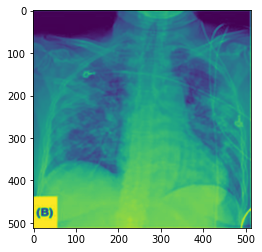

In [9]:
imshow(images[3000])

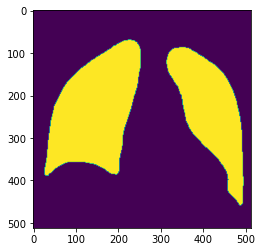

In [10]:
imshow(masks[3000])

In [7]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [8]:
#
#
R.setup_data(images, masks, dataset_size=3616, weights=weights)

Weights OK!


In [9]:
RUNS = 5

In [10]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
3/3 [==============================] - 28s 6s/step - loss: 1.2730 - dice_coeff: 0.3926 - val_loss: 1.2473 - val_dice_coeff: 0.3167
Epoch 2/100
3/3 [==============================] - 4s 2s/step - loss: 1.1398 - dice_coeff: 0.4430 - val_loss: 1.2452 - val_dice_coeff: 0.3347
Epoch 3/100
3/3 [==============================] - 4s 2s/step - loss: 1.0394 - dice_coeff: 0.4845 - val_loss: 1.2525 - val_dice_coeff: 0.3407
Epoch 4/100
3/3 [==============================] - 4s 2s/step - loss: 0.9864 - dice_coeff: 0.5065 - val_loss: 1.2559 - val_dice_coeff: 0.3424
Epoch 5/100
3/3 [==============================] - 4s 2s/step - loss: 0.8817 - dice_coeff: 0.5501 - val_loss: 1.2602 - val_dice_coeff: 0.3437
Epoch 6/100
3/3 [==============================] - 4s 2s/step - loss: 0.8008 - dice_coeff: 0.5843 - val_loss: 1.2631 - val_dice_coeff: 0.3453
Epoch 7/100
3/3 [==============================] - 4s 2s/step - loss: 0.7648 - dice_coeff: 0.6024 - val_loss: 1.2660 - val_dice_coeff: 0

In [11]:
R.classifier_scores

[[1.2788236141204834, 0.3114355504512787],
 [1.1690815687179565, 0.3383127748966217],
 [0.8765643835067749, 0.5058469176292419],
 [0.8389413952827454, 0.5244551301002502],
 [0.6446496844291687, 0.6349170804023743]]

In [12]:
R.discriminator_scores

[[0.5078598260879517, 0.9861111044883728],
 [2.526798725128174, 0.9351851940155029],
 [72.10820770263672, 0.5694444179534912],
 [80.03742218017578, 0.5555555820465088],
 [104.42404174804688, 0.5138888955116272]]

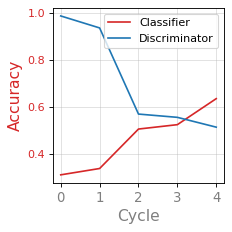

In [13]:
R.plot()